In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from dl_lib import *
from Mnist import mnist_imgread, mnist_labread

In [3]:
def prt_dataset(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(images.shape[1], images.shape[2]), cmap=plt.cm.binary)
        plt.xlabel('label:' + str(labels[i]))
    plt.show()

def plt_result(results:dict):
    for k, v in results.items():
        plt.plot(v, label=k)
    plt.xlabel('Epoch')
    plt.ylabel(k)
    plt.legend(loc='upper left')

train data
img shape:(60000, 28, 28, 1), lab shape:(60000, 1)


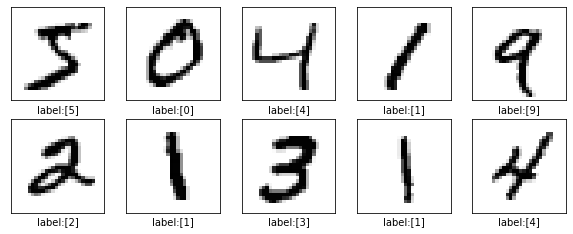

In [4]:
### read dataset
train_imgs = mnist_imgread('./dataset/train-images-idx3-ubyte.gz')
train_labs = mnist_labread('./dataset/train-labels-idx1-ubyte.gz')
print('train data\nimg shape:{}, lab shape:{}'.format(train_imgs.shape, train_labs.shape))
prt_dataset(train_imgs, train_labs)

train data
img shape:(60000, 28, 28, 1), lab shape:(60000, 1)


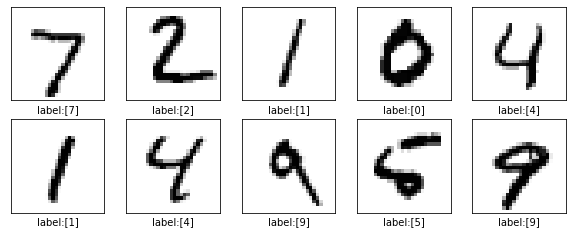

In [5]:
test_imgs = mnist_imgread('./dataset/t10k-images-idx3-ubyte.gz')
test_labs = mnist_labread('./dataset/t10k-labels-idx1-ubyte.gz')
print('train data\nimg shape:{}, lab shape:{}'.format(train_imgs.shape, train_labs.shape))
prt_dataset(test_imgs, test_labs)

## model 輸入

In [6]:
### model x
train_x = train_imgs
test_x = test_imgs
print('train_x :', train_x.shape)
print('test_x', test_x.shape)

train_x : (60000, 28, 28, 1)
test_x (10000, 28, 28, 1)


In [7]:
### model y (labels one hot encoding)
onehot = OneHot(np.arange(0,10))
train_y = onehot.encoding(train_labs)
test_y = onehot.encoding(test_labs)
print('train_y :', train_y.shape)
print('test_y', test_y.shape)

train_y : (60000, 10, 1)
test_y (10000, 10, 1)


## 創建模組

In [8]:
layers = (
    Flatten(),


    Dense(128),
    BatchNorm(),
    ReLU(),
    Dropout(0.25),

    Dense(10),
    Softmax(),

)

In [9]:
model = Model(layers=layers)
loss = CategoricalCrossEntropy()
optimizer=Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, lossfunc=loss)

In [10]:
### training
history = model.fit(train_x, train_y, test_x, test_y, epoch=50, batch_size=256, clean_opt=50)


<01> --------------------------------------------------------------------------------
    training[========================>] acc:86.61, loss:6.544e-01
    evaluate[========================>] acc:92.24, loss:2.880e-01

<02> --------------------------------------------------------------------------------
    training[========================>] acc:93.35, loss:2.262e-01
    evaluate[========================>] acc:94.42, loss:1.827e-01

<03> --------------------------------------------------------------------------------
    training[========================>] acc:95.12, loss:1.618e-01
    evaluate[========================>] acc:95.61, loss:1.461e-01

<04> --------------------------------------------------------------------------------
    training[========================>] acc:96.07, loss:1.307e-01
    evaluate[========================>] acc:96.23, loss:1.255e-01

<05> --------------------------------------------------------------------------------
    training[========================

    training[========================>] acc:99.73, loss:1.156e-02
    evaluate[========================>] acc:98.10, loss:7.699e-02

<39> --------------------------------------------------------------------------------
    training[========================>] acc:99.77, loss:1.107e-02
    evaluate[========================>] acc:98.04, loss:7.638e-02

<40> --------------------------------------------------------------------------------
    training[========================>] acc:99.77, loss:1.071e-023
    evaluate[========================>] acc:98.10, loss:7.676e-02

<41> --------------------------------------------------------------------------------
    training[========================>] acc:99.79, loss:1.025e-02
    evaluate[========================>] acc:98.02, loss:7.837e-02

<42> --------------------------------------------------------------------------------
    training[========================>] acc:99.81, loss:9.621e-03
    evaluate[========================>] acc:98.05, loss:7

In [11]:
model.save('./mnist_h128_10.model')

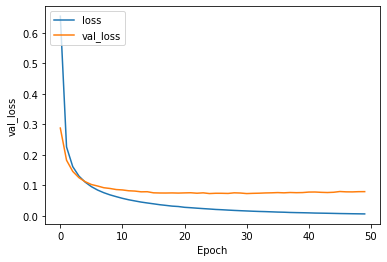

In [12]:
### 損失函數
plt_result({
    'loss' : history['los'],
    'val_loss': history['val_los'],
})

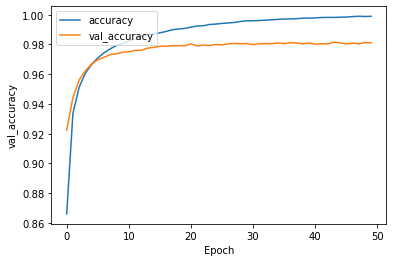

In [13]:
# 準確度
plt_result({
    'accuracy': history['acc'],
    'val_accuracy' : history['val_acc'],
})

In [14]:
### 模組評估
model.evaluate(test_x, test_y)

    evaluate[========================>] acc:98.11, loss:7.982e-02


(0.9811109539969834, 0.07982347166770284)